Анализ датасета

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()

Импортируем сет

In [2]:
data = pd.read_csv('input/Mass Shootings Dataset Ver 5.csv', encoding="ISO-8859-1")
print(data.shape)
data.head()

(323, 21)


,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


In [3]:
data.drop(['S#'], axis=1, inplace=True)

data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data['Day'] = data.Date.dt.day
data['Weekday'] = data.Date.dt.dayofweek

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 24 columns):
Title                   323 non-null object
Location                278 non-null object
Date                    323 non-null datetime64[ns]
Incident Area           261 non-null object
Open/Close Location     295 non-null object
Target                  318 non-null object
Cause                   246 non-null object
Summary                 323 non-null object
Fatalities              323 non-null int64
Injured                 323 non-null int64
Total victims           323 non-null int64
Policeman Killed        317 non-null float64
Age                     179 non-null object
Employeed (Y/N)         67 non-null float64
Employed at             41 non-null object
Mental Health Issues    323 non-null object
Race                    321 non-null object
Gender                  323 non-null object
Latitude                303 non-null float64
Longitude               303 non-null float64
Year    

Смотрим кол-во null значений

In [5]:
data.isnull().sum()

Title                     0
Location                 45
Date                      0
Incident Area            62
Open/Close Location      28
Target                    5
Cause                    77
Summary                   0
Fatalities                0
Injured                   0
Total victims             0
Policeman Killed          6
Age                     144
Employeed (Y/N)         256
Employed at             282
Mental Health Issues      0
Race                      2
Gender                    0
Latitude                 20
Longitude                20
Year                      0
Month                     0
Day                       0
Weekday                   0
dtype: int64

Кол-во по годам

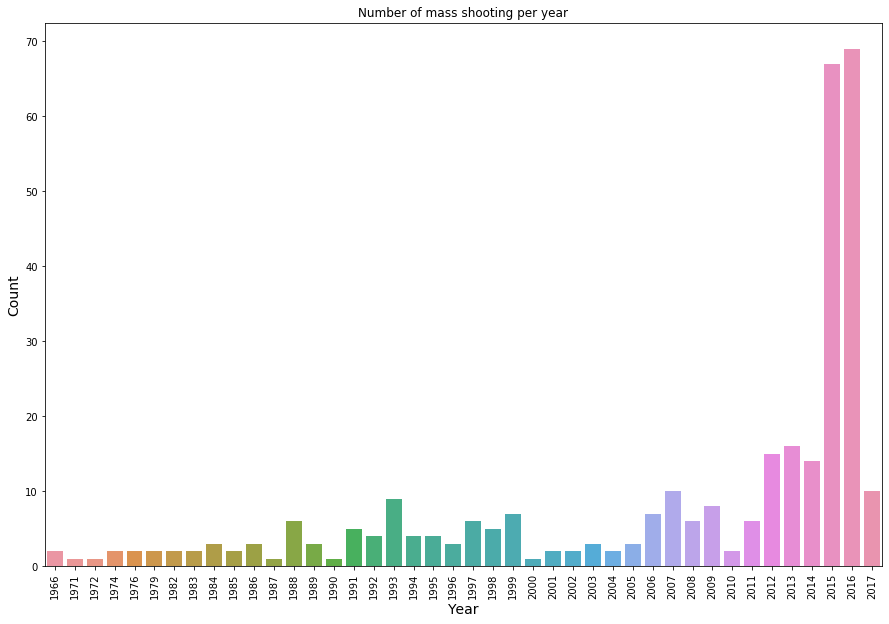

In [6]:
year_counts = data.Year.value_counts()

plt.figure(figsize=(15,10))
sns.barplot(year_counts.index, year_counts.values)
plt.title('Number of mass shooting per year')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.show()

Распределение по месяцам

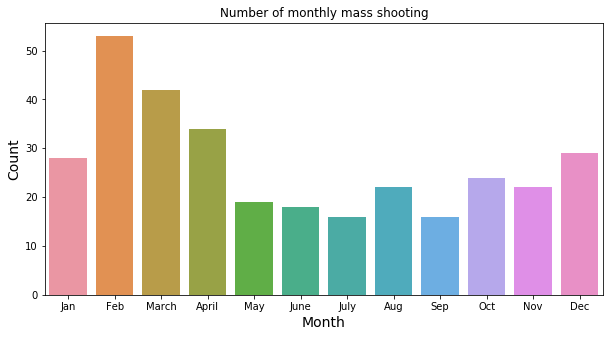

In [7]:
month_counts = data.Month.value_counts()

plt.figure(figsize=(10,5))
sns.barplot(month_counts.index, month_counts.values)
months = ('Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
plt.title('Number of monthly mass shooting')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(12), months)
plt.show()

Распределение по дням месяца

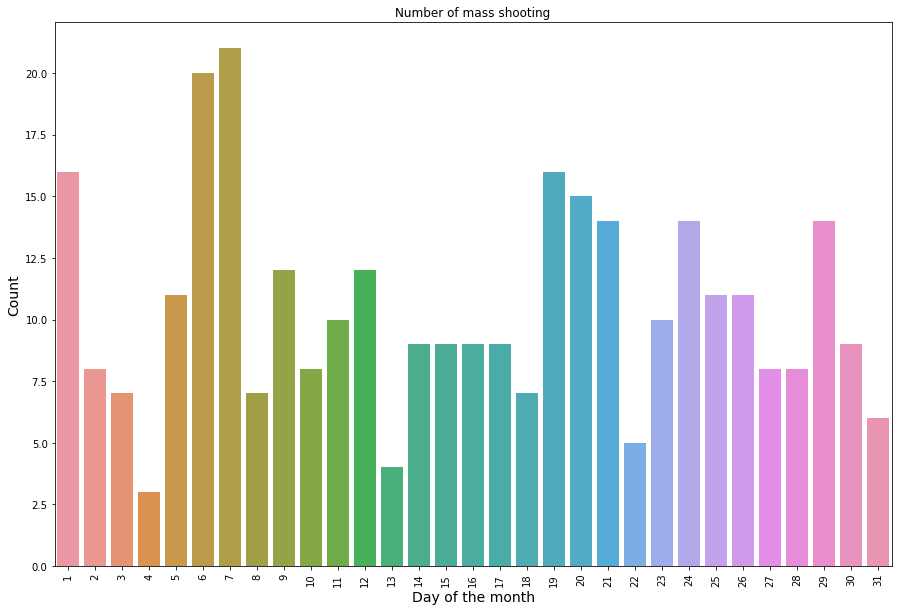

In [8]:
day_counts = data.Day.value_counts()

plt.figure(figsize=(15,10))
sns.barplot(day_counts.index, day_counts.values)
plt.title('Number of mass shooting')
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.show()

Распределение по дням недели

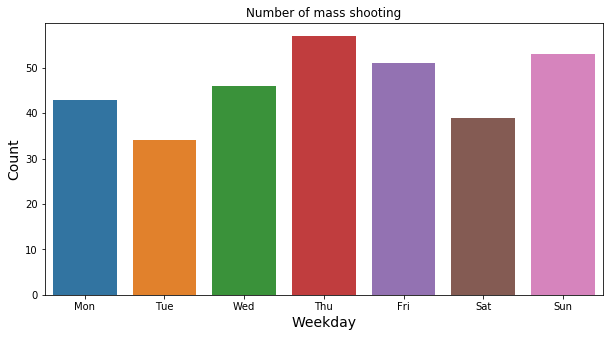

In [9]:
weekday_counts = data.Weekday.value_counts()

plt.figure(figsize=(10,5))
sns.barplot(weekday_counts.index, weekday_counts.values)
days = ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun')
plt.title('Number of mass shooting')
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(7), days)
plt.show()

Распределение по кол-ву смертей в перестрелках

Maximum number of fatalities in a mass shooting :  59
Minimum number of fatalities in a mass shooting :  0
Average number of fatalities in any mass shooting :  4


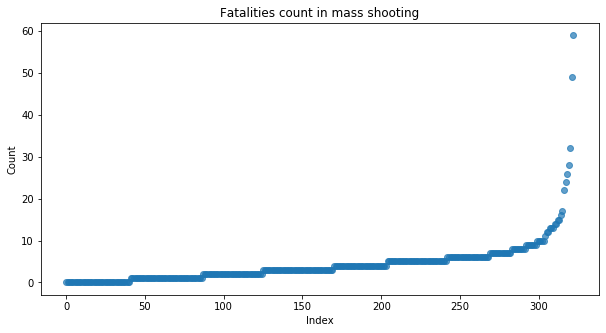

In [10]:
print("Maximum number of fatalities in a mass shooting : ", np.max(data['Fatalities']))
print("Minimum number of fatalities in a mass shooting : ", np.min(data['Fatalities']))
print("Average number of fatalities in any mass shooting : ", int(np.mean(data['Fatalities'])))

fat_count = data.Fatalities
plt.figure(figsize=(10,5))
plt.scatter(range(len(fat_count)), np.sort(fat_count.values), alpha=0.7)
plt.title("Fatalities count in mass shooting")
plt.xlabel("Index")
plt.ylabel("Count")
plt.show()

Распределение по кол-ву раненых в перестрелках

Maximum number of injured in a mass shooting :  527
Minimum number of injured in a mass shooting :  0
Average number of injured in any mass shooting :  6


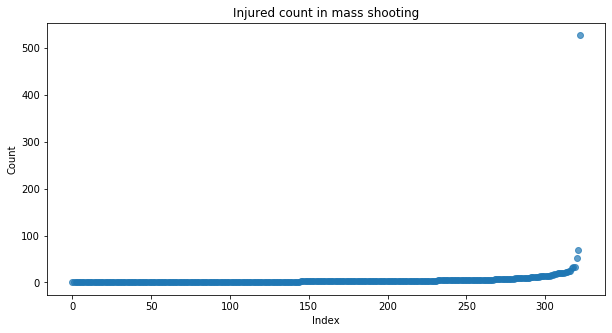

In [11]:
print("Maximum number of injured in a mass shooting : ", np.max(data['Injured']))
print("Minimum number of injured in a mass shooting : ", np.min(data['Injured']))
print("Average number of injured in any mass shooting : ", int(np.mean(data['Injured'])))

inj_count = data['Injured']
plt.figure(figsize=(10,5))
plt.scatter(range(len(inj_count)), np.sort(inj_count.values), alpha=0.7)
plt.title("Injured count in mass shooting")
plt.xlabel("Index")
plt.ylabel("Count")
plt.show()

Распределение по кол-ву пострадавших в перестрелках

Maximum number of victims in a mass shooting :  585
Minimum number of victims in a mass shooting :  3
Average number of victims in any mass shooting :  10


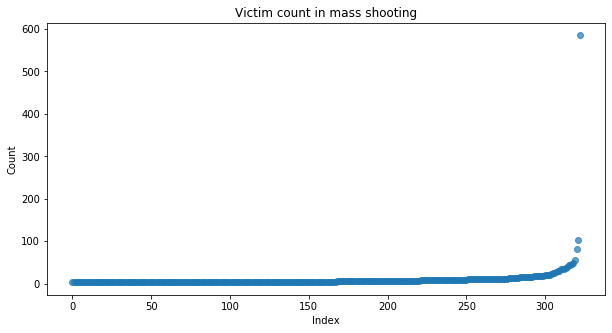

In [12]:
print("Maximum number of victims in a mass shooting : ", np.max(data['Total victims']))
print("Minimum number of victims in a mass shooting : ", np.min(data['Total victims']))
print("Average number of victims in any mass shooting : ", int(np.mean(data['Total victims'])))

victim_count = data['Total victims']
plt.figure(figsize=(10,5))
plt.scatter(range(len(victim_count)), np.sort(victim_count.values), alpha=0.7)
plt.title("Victim count in mass shooting")
plt.xlabel("Index")
plt.ylabel("Count")
plt.show()

Возникали ли у людей проблемы с психическим здоровьем

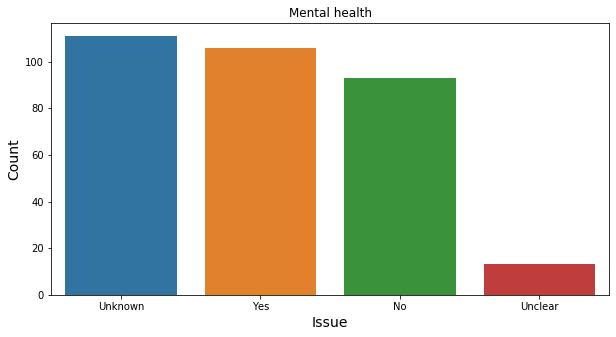

In [13]:
data['Mental Health Issues'] = data['Mental Health Issues'].apply(lambda x: 'Unknown' if x=='unknown' else x)

mental_health_count = data['Mental Health Issues'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(mental_health_count.index, mental_health_count.values)
plt.title('Mental health')
plt.xlabel('Issue', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(len(mental_health_count.index)), mental_health_count.index)
plt.show()


Раса стрелявшего

In [14]:
data['Race'] = data['Race'].apply(lambda x : 'White' if x=='white' else x)
data['Race'] = data['Race'].apply(lambda x : 'Black' if x=='black' else x)

data['Race'] = data['Race'].apply(lambda x : 'White American or European American' 
                                  if x=='White American or European American/Some other Race' else x)

data['Race'] = data['Race'].apply(lambda x : 'Black American or African American' 
                                  if x=='Black American or African American/Unknown' else x)

data['Race'] = data['Race'].apply(lambda x : 'Asian American' if x=='Asian American/Some other race' else x)
data['Race'] = data['Race'].apply(lambda x : 'Unknown' if x=='Two or more races' or x =='unknown' else x)

data['Race'] = data['Race'].apply(lambda x : 'Other' if x=='Some other race' else x)

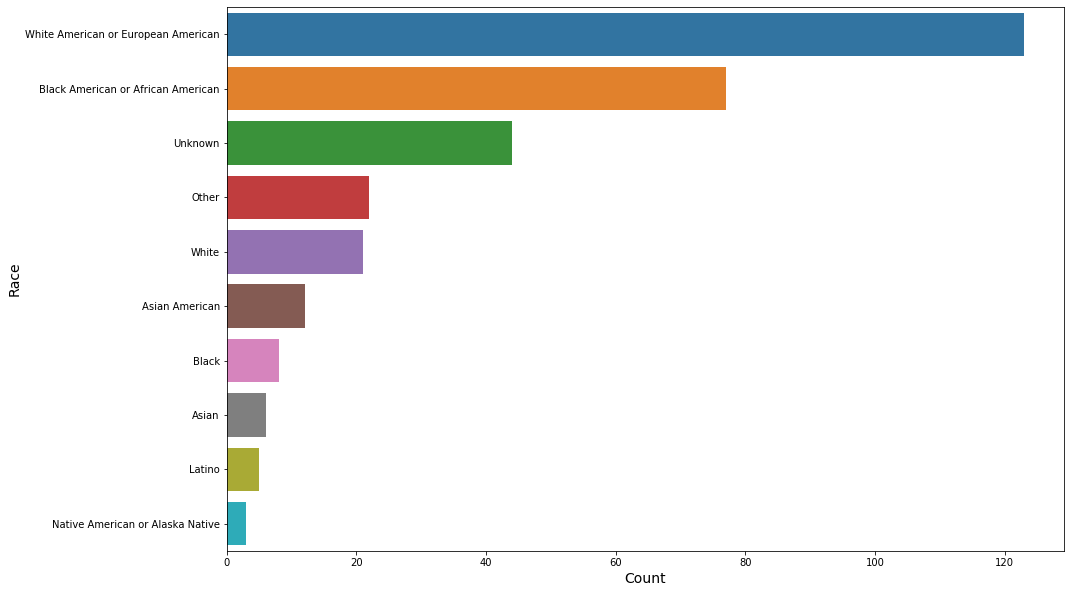

In [15]:
race_count = data['Race'].value_counts()

plt.figure(figsize=(15,10))
sns.barplot(race_count.values, race_count.index, orient='h')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Race', fontsize=14)
plt.show()

Пол стреляющих

In [16]:
data['Gender'] = data['Gender'].apply(lambda x: 'Male' if x=='M' else x)
data['Gender'] = data['Gender'].apply(lambda x: 'Unknown' if x=='M/F' or x=='Male/Female' else x)

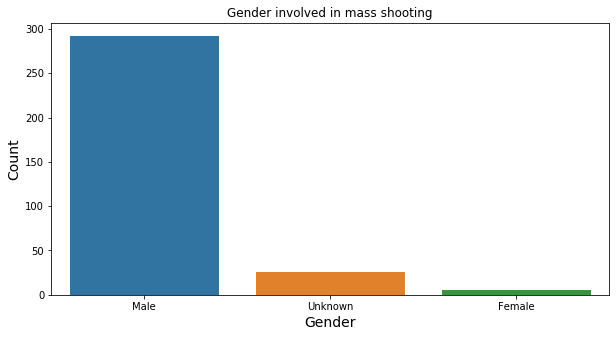

In [17]:
gender = data['Gender'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(gender.index, gender.values)
plt.title('Gender involved in mass shooting')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(len(gender.index)), gender.index)
plt.show()

Облако тегов

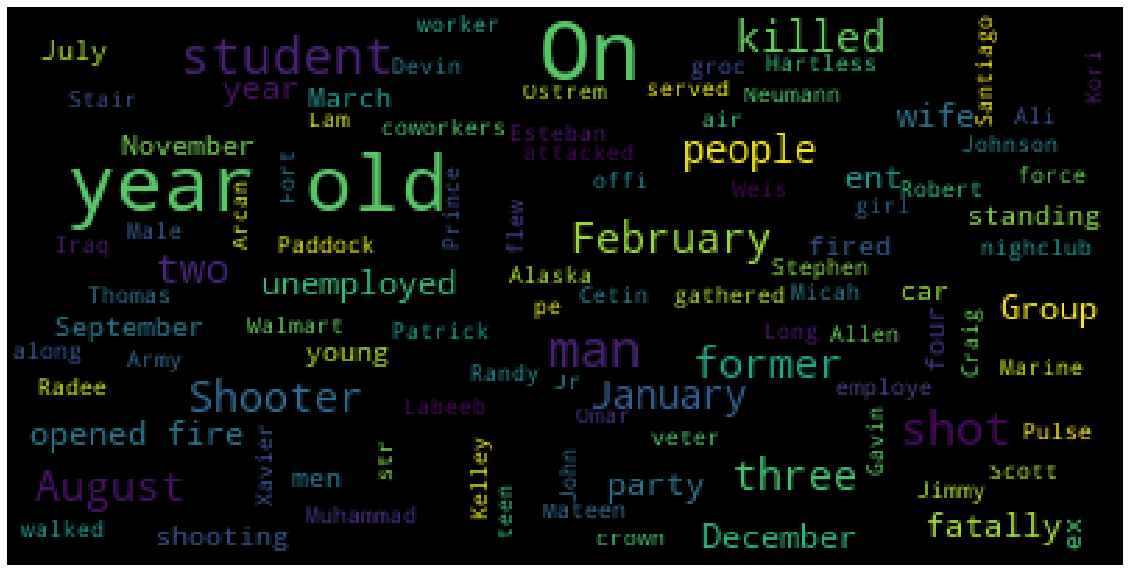

In [18]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='black',
                        stopwords=stopwords,
                        max_words=100,
                        max_font_size=30, 
                        random_state=42).generate(str(data['Summary']))

plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()